# Rescaled beta

The goal of the analysis is to check the distribution of the rescaled beta


## Data loading

The data required for the analysis is loaded from the `computed maf` dataset.


In [1]:
import plotnine as p9
from gentropy.common.session import Session
from pyspark.sql import functions as f

from manuscript_methods import OpenTargetsTheme, group_statistics
from manuscript_methods.datasets import LeadVariantEffect


Loading BokehJS ...

In [2]:
session = Session(extended_spark_conf={"spark.driver.memory": "40G"})
lead_maf_dataset_path = "../../data/lead_variant_effect_replicated"


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/30 11:30:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/06/30 11:30:11 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/06/30 11:30:11 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
session.spark


In [4]:
dataset_maf = LeadVariantEffect.from_parquet(session, lead_maf_dataset_path)
est_beta = dataset_maf.df.select(
    "rescaledStatistics.estimatedBeta", "rescaledStatistics.majorAlleleEstimatedBeta"
).toPandas()
est_beta.describe()


,estimatedBeta,majorAlleleEstimatedBeta
count,1.723475e+06,1.723475e+06
mean,1.098293e-01,1.706900e-01
std,2.721390e+00,2.718252e+00
min,-4.431611e+02,-4.431611e+02
25%,-7.054951e-01,-6.622602e-01
50%,2.241179e-02,4.705124e-02
75%,7.833632e-01,8.235501e-01
max,2.152689e+02,2.152689e+02


## Plot the distribution of estimated betas

The distribution of the rescaled beta is plotted using a histogram. The x-axis represents the rescaled beta values, while the y-axis shows the frequency of these values.

The y-axis is limited to the 1000, to see the distribution tails more clearly.


/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning:

Saving 5.35 x 4.5 in image.

/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning:

Filename: plots/01.2_rescaled_betas.jpg

/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 1675 rows containing non-finite values.

/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 1675 rows containing non-finite values.



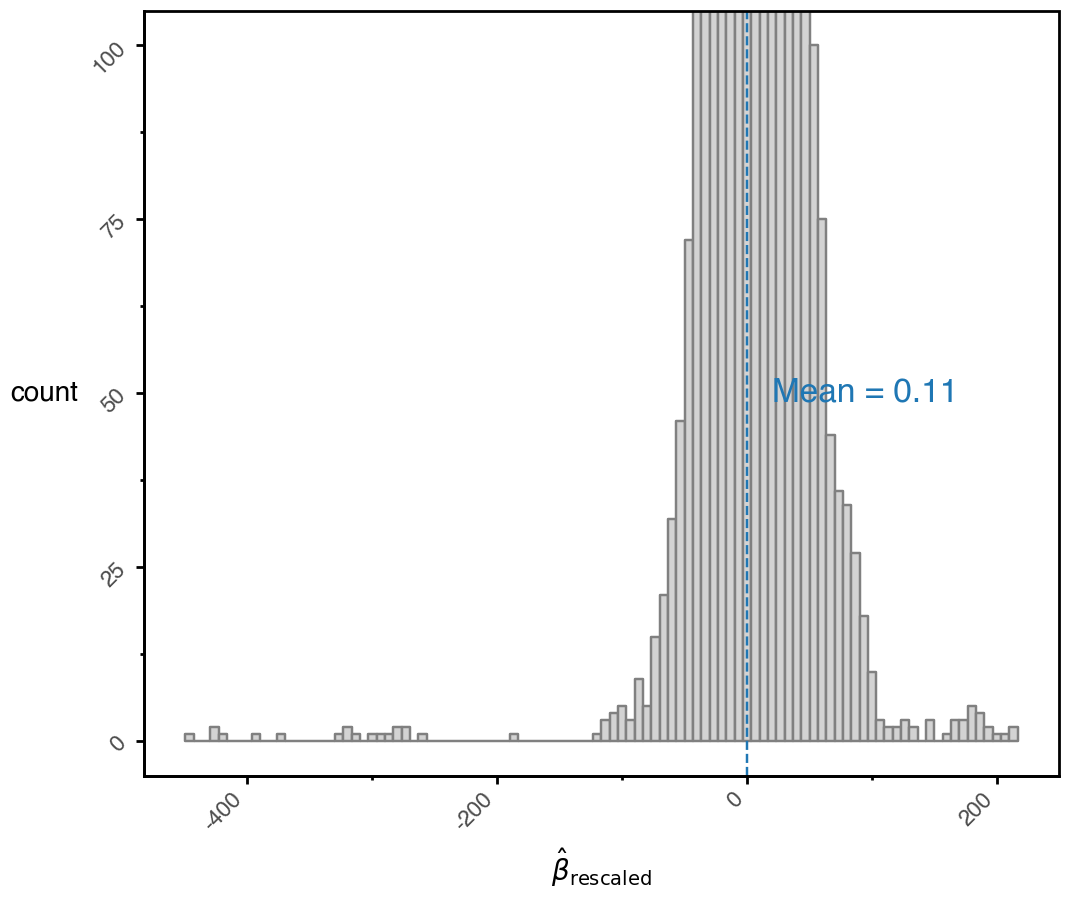

In [5]:
REM = 10
mean_val = est_beta["estimatedBeta"].mean()
median_val = est_beta["estimatedBeta"].median()
xmax = est_beta["estimatedBeta"].max()
xmin = est_beta["estimatedBeta"].min()
ymax = 100

p = (
    p9.ggplot(data=est_beta, mapping=p9.aes(x="estimatedBeta"))
    + p9.geom_histogram(
        bins=100,
        color="grey",
        fill="lightgray",
    )
    + p9.coord_cartesian(ylim=(0, 100))  # limit y-axis to hide the spike
    + p9.labs(x=r"$\hat{\beta}_{\mathrm{rescaled}}$")
    + p9.geom_vline(xintercept=mean_val, color="#1f77b4", linetype="dashed", size=0.5, show_legend=True)
    + OpenTargetsTheme.theme
    + p9.annotate(
        "text",
        x=mean_val + 20,
        y=50,
        label=f"Mean = {mean_val:.2f}",
        ha="left",
        size=12,
        color="#1f77b4",
        fontweight="bold",
    )
)


p.save("plots/01.2_rescaled_betas.jpg", dpi=300, bbox_inches="tight")
p


## Plot the major allele estimated beta

major allele estimated beta (similar for estimated beta, but swapped the sign of the beta when the effect allele is major)


/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning:

Saving 5.35 x 4.5 in image.

/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning:

Filename: plots/01.2_major_allele_rescaled_betas.jpg

/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 1675 rows containing non-finite values.

/Users/ss60/Projects/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 1675 rows containing non-finite values.



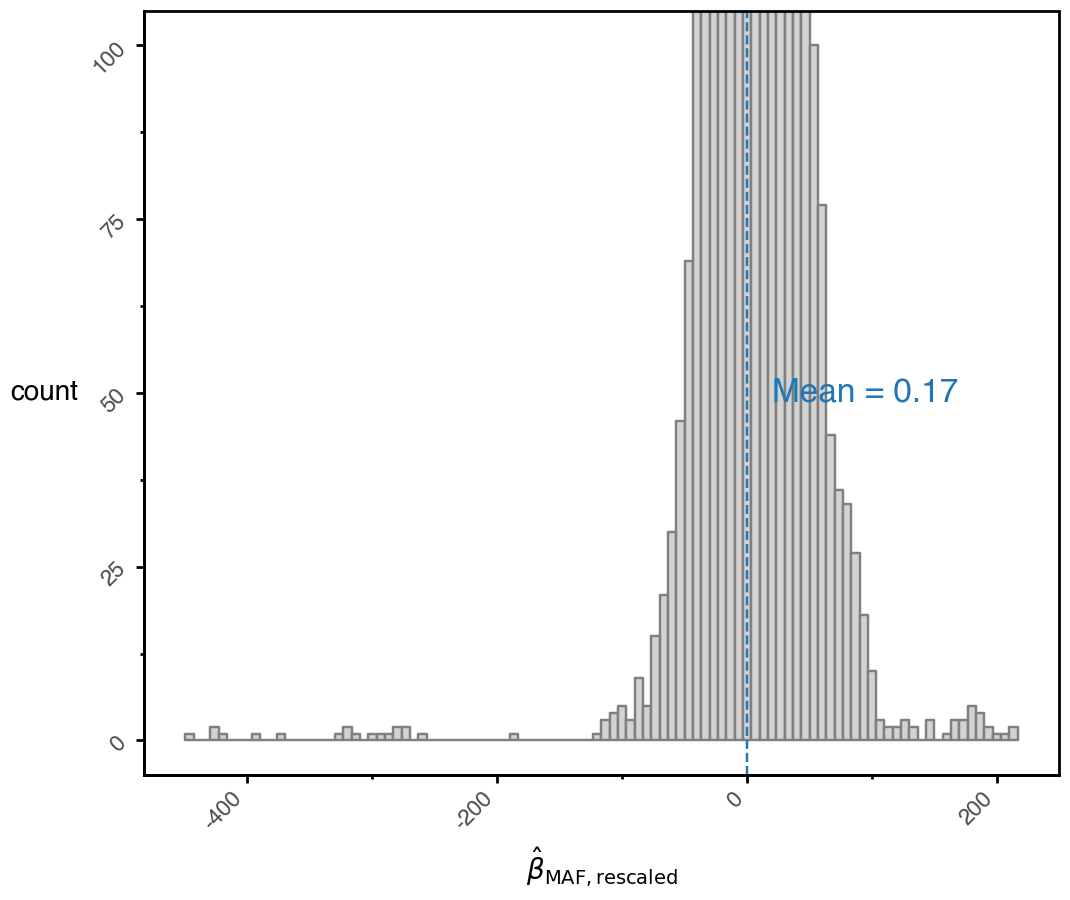

In [6]:
REM = 10
mean_val = est_beta["majorAlleleEstimatedBeta"].mean()
median_val = est_beta["majorAlleleEstimatedBeta"].median()
xmax = est_beta["majorAlleleEstimatedBeta"].max()
xmin = est_beta["majorAlleleEstimatedBeta"].min()
ymax = 100

p = (
    p9.ggplot(data=est_beta, mapping=p9.aes(x="majorAlleleEstimatedBeta"))
    + p9.geom_histogram(
        bins=100,
        color="grey",
        fill="lightgray",
    )
    + p9.coord_cartesian(ylim=(0, 100))  # limit y-axis to hide the spike
    + p9.labs(x=r"$\hat{\beta}_{\mathrm{MAF,rescaled}}$")
    + p9.geom_vline(xintercept=mean_val, color="#1f77b4", linetype="dashed", size=0.5, show_legend=True)
    + OpenTargetsTheme.theme
    + p9.annotate(
        "text",
        x=mean_val + 20,
        y=50,
        label=f"Mean = {mean_val:.2f}",
        ha="left",
        size=12,
        color="#1f77b4",
        fontweight="bold",
    )
)


p.save("plots/01.2_major_allele_rescaled_betas.jpg", dpi=300, bbox_inches="tight")
p


## Find the cutoff on the rescaled beta size


In [20]:
est_beta.describe()


,estimatedBeta,majorAlleleEstimatedBeta
count,1.723475e+06,1.723475e+06
mean,1.098293e-01,1.706900e-01
std,2.721390e+00,2.718252e+00
min,-4.431611e+02,-4.431611e+02
25%,-7.054951e-01,-6.622602e-01
50%,2.241179e-02,4.705124e-02
75%,7.833632e-01,8.235501e-01
max,2.152689e+02,2.152689e+02


In [ ]:
plot = (
    p9.ggplot(data=est_beta[abs(est_beta["estimatedBeta"]) < 20], mapping=p9.aes(y="estimatedBeta")) + p9.geom_violin()
)

for v in [3, 5, 10, 20]:
    plot += p9.geom_hline(yintercept=v, color="red", linetype="dashed", size=0.5, show_legend=True)
    plot += p9.annotate(
        "text",
        x=0,
        y=v + 1,
        label=f"{v}",
        ha="left",
        size=12,
        color="red",
        fontweight="bold",
    )
plot


/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 5.35 x 4.5 in image.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: plots/01.2_rescaled_betas_after_filter.jpg


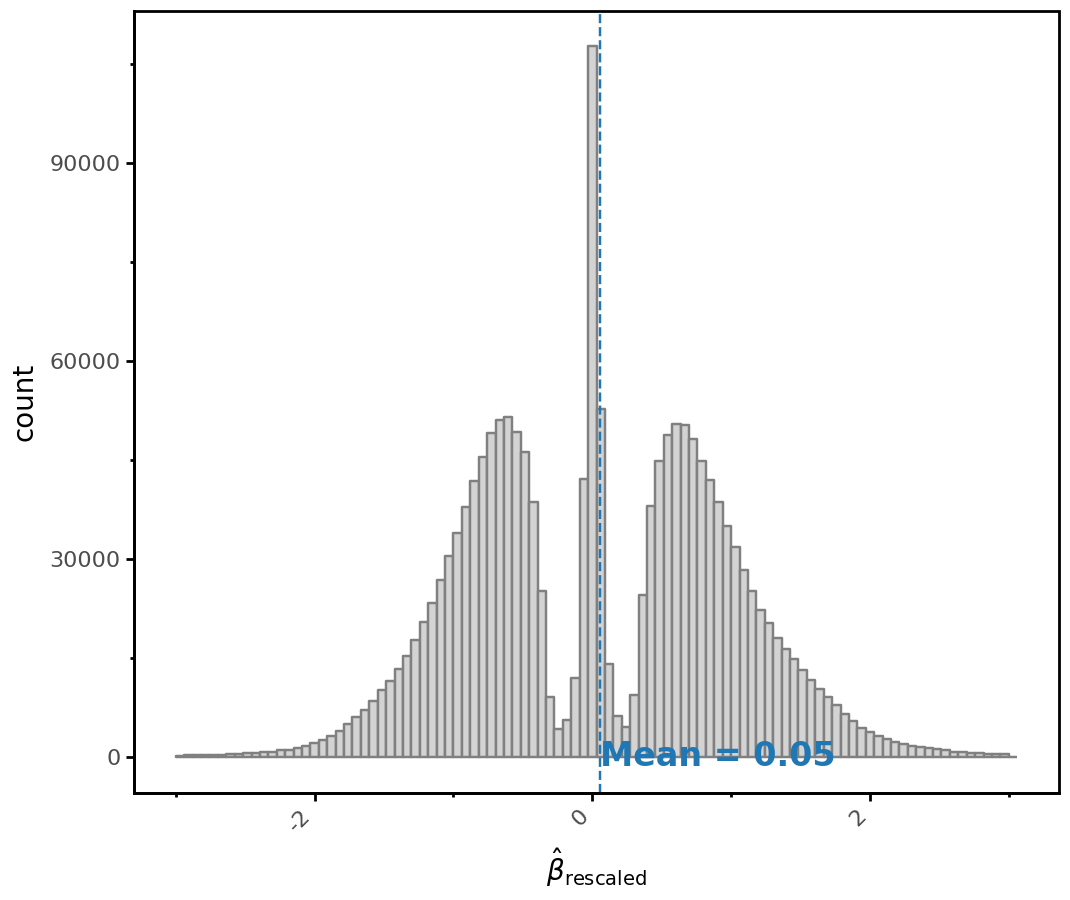

In [ ]:
REM = 10
data = est_beta[abs(est_beta["estimatedBeta"]) < 3]
mean_val = data["estimatedBeta"].mean()
median_val = data["estimatedBeta"].median()
xmax = data["estimatedBeta"].max()
xmin = data["estimatedBeta"].min()
ymax = 100

p = (
    p9.ggplot(data=data, mapping=p9.aes(x="estimatedBeta"))
    + p9.geom_histogram(
        bins=100,
        color="grey",
        fill="lightgray",
    )
    # + p9.coord_cartesian(ylim=(0, 100))  # limit y-axis to hide the spike
    + p9.labs(x=r"$\hat{\beta}_{\mathrm{rescaled}}$")
    + p9.geom_vline(xintercept=mean_val, color="#1f77b4", linetype="dashed", size=0.5, show_legend=True)
    + OpenTargetsTheme.theme
    + p9.annotate(
        "text",
        x=mean_val,
        y=50,
        label=f"Mean = {mean_val:.2f}",
        ha="left",
        size=12,
        color="#1f77b4",
        fontweight="bold",
    )
)


p.save("plots/01.2_rescaled_betas_after_filter.jpg", dpi=300, bbox_inches="tight")
p


## Compare the two estimated betas

- calculate the correlation
- calculate the % of difference between the two betas


In [18]:
corr = est_beta.corr()
corr


,estimatedBeta,majorAlleleEstimatedBeta
estimatedBeta,1.000000,0.895995
majorAlleleEstimatedBeta,0.895995,1.000000


In [16]:
group_stats = group_statistics(
    dataset_maf.df.select("rescaledStatistics.estimatedBeta", "rescaledStatistics.majorAlleleEstimatedBeta").withColumn(
        "betaMatch",
        f.when(f.col("estimatedBeta") == f.col("majorAlleleEstimatedBeta"), f.lit(True)).otherwise(False),
    ),
    f.col("betaMatch"),
).orderBy(f.desc("count"))

group_stats.show()


+---------+-------+-----+------------------+
|betaMatch|  count|    %|        percentage|
+---------+-------+-----+------------------+
|     true|1247805|72.33| 72.33023215372576|
|    false| 477345|27.67|27.669767846274233|
+---------+-------+-----+------------------+



/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 5.35 x 4.5 in image.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: plots/01.2_betas_concordance.jpg


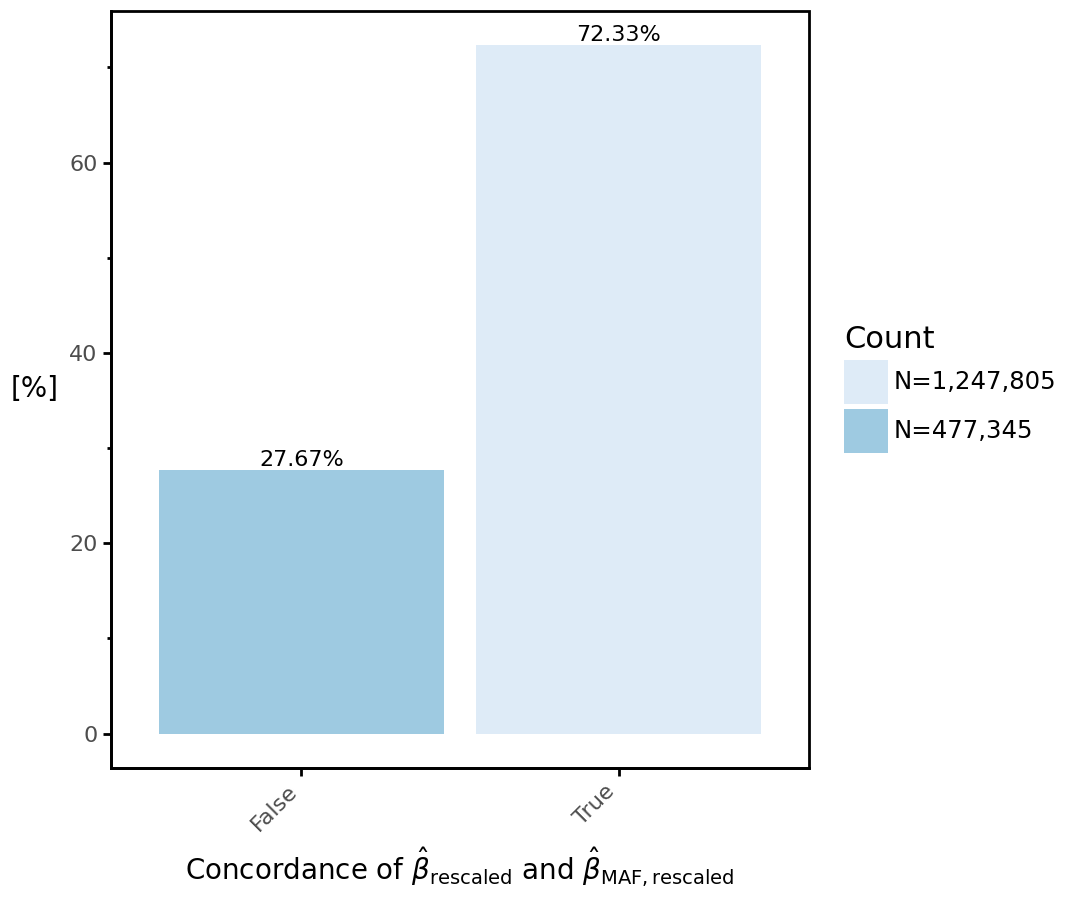

In [17]:
data = group_stats.toPandas()
data["label"] = "N=" + data["count"].apply(lambda x: f"{x:,}")
plot = (
    p9.ggplot(data=data, mapping=p9.aes(x="betaMatch", y="percentage", fill="label"))
    + p9.geom_col(stat="identity")
    + p9.scale_fill_brewer(type="seq")
    + OpenTargetsTheme.theme
    + p9.geom_text(
        p9.aes(label="%"),
        size=8,
        va="bottom",
        format_string="{}%",
    )
    + p9.labs(
        x=r"Concordance of $\hat{\beta}_{\mathrm{rescaled}}$ and $\hat{\beta}_{\mathrm{MAF,rescaled}}$",
        y="[%]",
        fill="Count",
    )
    + p9.theme(axis_title_y=p9.element_text(size=10, rotation=0))
)

plot.save("plots/01.2_betas_concordance.jpg", dpi=300, bbox_inches="tight")
plot
